## Extraindo Dados de Ações com uma Biblioteca Python

As ações de uma empresa representam partes da sua propriedade. Mais especificamente:

Uma ação (também chamada de equity) é um título que indica a posse de uma fração de uma empresa. Isso dá ao acionista o direito a uma parte proporcional dos ativos e lucros da corporação, de acordo com a quantidade de ações que possui. As unidades das ações são conhecidas como "shares" (ações).

Um investidor pode comprar ações e vendê-las futuramente. Se o preço da ação aumentar, ele obtém lucro; se cair, sofre prejuízo. O preço de uma ação é influenciado por vários fatores, como o número de ações em circulação, as projeções de lucro da empresa e outros elementos do mercado. Durante o pregão, as ações são negociadas continuamente, e os tickers de ações atualizam em tempo real os preços nos diversos mercados.

In [8]:
import yfinance as yf
import pandas as pd
import urllib.request

### Utilizando a Biblioteca yfinance para Extrair Dados de Ações

Com a biblioteca yfinance, podemos usar o módulo Ticker para criar um objeto que nos dá acesso a diversas funções para obter dados financeiros. Para isso, é necessário informar o símbolo da ação (ticker symbol) da empresa desejada.

Por exemplo, no caso da Apple, o ticker é AAPL. Ao criar um objeto com esse símbolo, conseguimos acessar facilmente informações como o histórico de preços, dados financeiros e muito mais.

In [9]:
apple = yf.Ticker("AAPL")

Agora podemos acessar diversas funções e variáveis que permitem extrair os tipos de dados que desejamos. Você pode consultar a lista completa dessas funções e o que cada uma representa acessando o link: https://aroussi.com/post/python-yahoo-finance.

In [12]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json"
arquivo_destino = "apple.json"

urllib.request.urlretrieve(url, arquivo_destino)
print("Download concluído!")


Download concluído!


Podemos utilizar o atributo info para obter diversas informações sobre a ação, retornadas no formato de um dicionário Python.

In [13]:
import json
with open('apple.json') as json_file:
    apple_info = json.load(json_file)
    # Print the type of data variable    
    #print("Type:", type(apple_info))
apple_info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

In [14]:
apple_info['country']

'United States'

### Obtendo o Preço das Ações

Uma ação representa a menor parte de propriedade de uma empresa que pode ser comprada. O valor dessas ações varia ao longo do tempo. Para acessar o histórico de preços de uma ação, podemos utilizar o método history() da biblioteca yfinance.

Esse método permite recuperar os preços das ações em um determinado intervalo de tempo. Podemos definir esse intervalo por meio do parâmetro period, que indica o quão distante do presente os dados devem ser coletados.

As opções disponíveis para o period são:
1d (1 dia), 5d, 1mo (1 mês), 3mo, 6mo, 1y (1 ano), 2y, 5y, 10y, ytd (ano até agora) e max (dados disponíveis desde o início).

In [16]:
apple_share_price_data = apple.history(period="max")
apple_share_price_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.098597,0.099025,0.098597,0.098597,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.093881,0.093881,0.093453,0.093453,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087022,0.087022,0.086594,0.086594,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.088737,0.089165,0.088737,0.088737,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091310,0.091738,0.091310,0.091310,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2025-06-02 00:00:00-04:00,200.279999,202.130005,200.119995,201.699997,35423300,0.0,0.0
2025-06-03 00:00:00-04:00,201.350006,203.770004,200.960007,203.270004,46381600,0.0,0.0
2025-06-04 00:00:00-04:00,202.910004,206.240005,202.100006,202.820007,43604000,0.0,0.0


Os dados retornados pelo método history() vêm no formato de um DataFrame do Pandas. Nesse DataFrame, a data é usada como índice, e para cada dia são exibidas informações como: abertura (Open), máxima (High), mínima (Low), fechamento (Close), volume de negociações (Volume) e divisões de ações (Stock Splits).

In [17]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.098597,0.099025,0.098597,0.098597,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.093881,0.093881,0.093453,0.093453,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087022,0.087022,0.086594,0.086594,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.088737,0.089165,0.088737,0.088737,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091310,0.091738,0.091310,0.091310,73449600,0.0,0.0


Podemos redefinir o índice do DataFrame usando a função reset_index(). Ao definir o parâmetro inplace=True, a alteração é aplicada diretamente no próprio DataFrame, sem a necessidade de criar uma nova cópia.

In [18]:
apple_share_price_data.reset_index(inplace=True)

<Axes: xlabel='Date'>

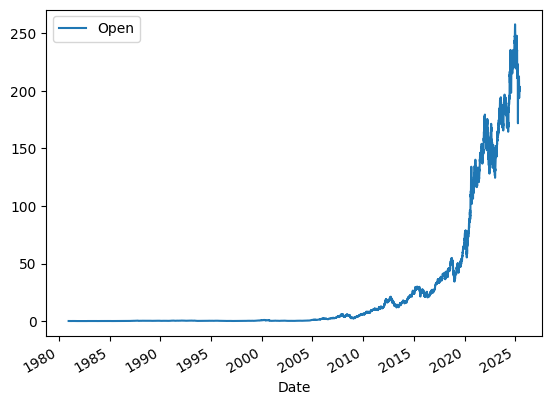

In [19]:
apple_share_price_data.plot(x="Date", y="Open")

Dividendos são a distribuição dos lucros de uma empresa aos seus acionistas. Basicamente, representam um valor em dinheiro pago por cada ação que o investidor possui.

Ao acessar a variável dividends, podemos obter um DataFrame contendo esses dados. O período abrangido por esses dividendos corresponde ao intervalo definido no parâmetro period da função history().

In [21]:
dividends = apple.dividends
dividends.head()

Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
Name: Dividends, dtype: float64

<Axes: xlabel='Date'>

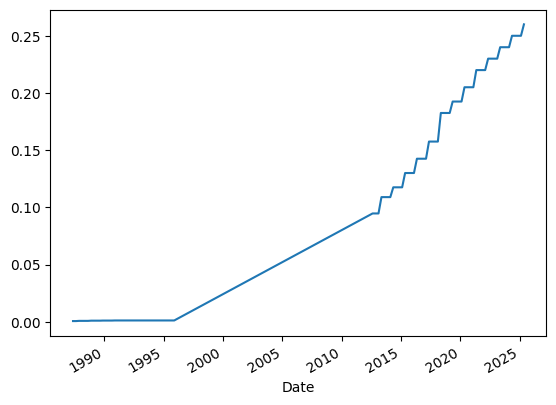

In [22]:
dividends.plot()

O código acima utiliza a biblioteca `yfinance` para obter dados históricos da ação da Apple.

1. Primeiro, criamos um objeto `Ticker` para a Apple, passando o símbolo `"APPLE"` como parâmetro.
2. Em seguida, usamos o método `history()` com o argumento `period="max"` para baixar o histórico completo de negociações da ação.
3. Os dados retornados são armazenados em um DataFrame chamado `amd_data`.
4. Por fim, acessamos o volume de ações negociadas no primeiro dia disponível no histórico, usando `iloc[0]['Volume']`, e imprimimos esse valor na tela.

Esse procedimento permite analisar o volume de negociações da ação da Apple desde o seu primeiro registro disponível.



In [24]:
apple_data = apple.history(period="max")
volume_first_day = apple_data.iloc[0]['Volume']
print("Volume negociado no primeiro dia:", volume_first_day)

Volume negociado no primeiro dia: 469033600.0
